In [1]:
import pandas as pd
import numpy as np
from numpy import random as rand
from collections import Counter
import matplotlib.pyplot as plt
import scipy.stats as stats
import itertools

rand.seed(13342)

# todo 
# replace xander's UIN
# I dont think question 2 calculates the fractions correctly. 
# por part A The fractions sum up to be >= 1 since there is always a winner and there can be ties

# Question 1

Xander's last 3 digits of UIN is 123. The mean of the exponential distribution is $\mu = \frac{1}{\lambda}$ and the variance is $\sigma^2 = \frac{1}{\lambda^2}$. First sample $x_i$ n times from the exponential distribution with mean = UIN. $\mu = \frac{1}{\lambda} \rightarrow \text{UIN}= \frac{1}{\lambda} \rightarrow \lambda = \frac{1}{\text{UIN}}$
$$x_i \sim \text{Exp}
\left(
\lambda = \frac{1}{\text{UIN}}
\right)$$

The sample mean can be used to estimate the true distribution's mean. Similarly with the sample variance.

$$\bar x = \frac{1}{n}\sum_{i=1}^n x_i$$
$$s^2 = \frac{1}{n-1}\sum_{i=1}^n (x_i - \bar x)^2$$

In [2]:
n = 5000
UIN = 123

true_mean = UIN
true_var = UIN**2
x_samples = rand.exponential(UIN, n)

x_sample_mean = 1/n*sum(x_samples)
x_sample_var = 1/(n-1)*sum((x_samples-x_sample_mean)**2)

print(f"True Mean: {true_mean:.4f}")
print(f"True Variance: {true_var:.4f}")
print(f"Sample Mean: {x_sample_mean:.4f}")
print(f"Sample Variance: {x_sample_var:.4f}")

True Mean: 123.0000
True Variance: 15129.0000
Sample Mean: 121.3041
Sample Variance: 14735.0546


## Question 1b
The law of large numbers ensures the mean estimates converge to the true value as n approaches infinity. Lets plot our estimates vs n and see how they converge. Note: We burn in values on the plot for better visualization. Burn in values are not taken out of the sample mean, they are purely for plotting the data

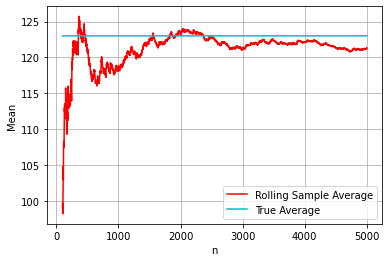

In [3]:
burn_in = 100
n_values = np.arange(1,len(x_samples)+1)
rolling_sample_mean = x_samples.cumsum() /  n_values


x_samples_burned = x_samples[burn_in:]
n_values_burned = n_values[burn_in:]
rolling_sample_mean_burned = rolling_sample_mean[burn_in:]

plt.plot(n_values_burned,
         rolling_sample_mean_burned,
         "r",label="Rolling Sample Average")
plt.plot(n_values_burned,
         np.ones_like(rolling_sample_mean_burned)*true_mean,
         "-c",label="True Average")

plt.xlabel("n")
plt.ylabel("Mean")
plt.grid()
plt.legend()

How fast and how much should they converge if they are truely distributed like the program says they are? Since $\bar x$ is a random variable itself, we can derive the the moment and use the fact that they are normally distributed with large n.

$$\text{E}[\bar x] = \text{E}\left[
\frac{1}{n}\sum_{i=1}^n x_i
\right]$$
$$\text{E}[\bar x] =\frac{1}{n}\sum_{i=1}^n \text{E}\left[x_i\right]$$
$$\text{E}[\bar x] =\frac{1}{n}\sum_{i=1}^n \mu$$
$$\text{E}[\bar x] = \mu$$

$$$$
$$\text{Var}[\bar x] = \text{Var}\left[
\frac{1}{n}\sum_{i=1}^n x_i
\right]$$
$$\text{Var}[\bar x] = \frac{1}{n^2}\text{Var}\left[\sum_{i=1}^n x_i\right]$$
Here we use the fact that $x_i$ are independently distributed.  
$$\text{Var}[\bar x] = \frac{1}{n^2}\sum_{i=1}^n \text{Var}\left[x_i\right]$$
$$\text{Var}[\bar x] = \frac{1}{n^2}\sum_{i=1}^n \sigma^2$$
$$\text{Var}[\bar x] = \frac{\sigma^2}{n}$$

Lets run several monte carlo simulations for $\bar x$ and see how they all coverge converge. We will compare it to +/- 1 standard deviation of x bar.

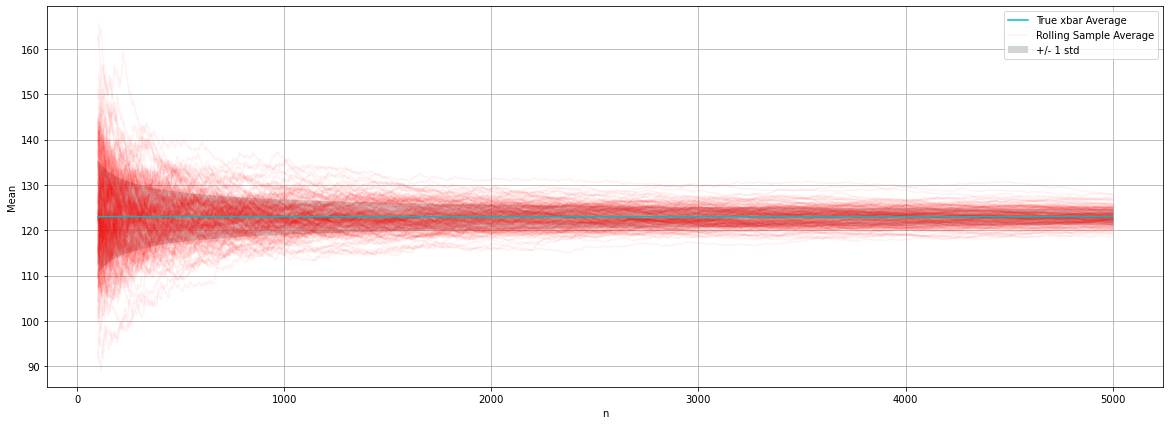

In [4]:
max_simulation = 200

# Plot True Dist.
true_x_bar_var = true_var / n_values
true_x_bar_std = np.sqrt(true_x_bar_var)
true_x_bar_std_burned = true_x_bar_std[burn_in:]

plt.figure(figsize=(20,7))
plt.fill_between(n_values_burned,
                 true_mean - true_x_bar_std_burned, 
                 true_mean + true_x_bar_std_burned, 
                 alpha=1, linewidth=0,
                 label="+/- 1 std",color="lightgrey")
plt.plot(n_values_burned,
         np.ones_like(true_x_bar_std_burned)*true_mean,
         "-c",label="True xbar Average",zorder=10)

# Run Simulations
final_simulation_estimates = list()
for i in range(max_simulation):
    # Sample
    x_samples = rand.exponential(UIN, n)
    
    # Calculate rolling estimates
    n_values = np.arange(1,len(x_samples)+1)
    rolling_sample_mean = x_samples.cumsum() /  n_values
    final_simulation_estimates.append(rolling_sample_mean[-1])
    
    # Plot
    x_samples_burned = x_samples[burn_in:]
    n_values_burned = n_values[burn_in:]
    rolling_sample_mean_burned = rolling_sample_mean[burn_in:]
    plt.plot(n_values_burned,
             rolling_sample_mean_burned,
             "-r",label="Rolling Sample Average",alpha=.05)
    
    # Ensures we dont have multiple labels on the legend
    if i ==0:
        plt.legend()
plt.xlabel("n")
plt.ylabel("Mean")
plt.grid()
plt.show()

For each of the simulations we plotted the sample mean at each iteration. These test statistics converge correctly following the trend of the true distribution. We can also ensure the final estimates are normally distributed at the end. To do this we plot a histogram of values

Text(0, 0.5, 'pdf f(x)')

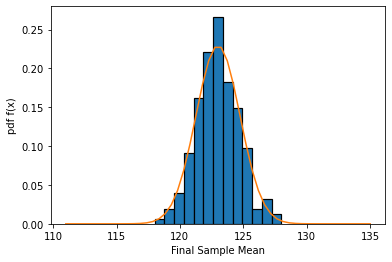

In [5]:
final_simulation_estimates = np.array(final_simulation_estimates)
plt.hist(final_simulation_estimates, 
         bins=np.linspace(true_mean-5,true_mean+5, 14),
         density=True, edgecolor='black', linewidth=1.2)
x = np.linspace(true_mean-12,true_mean+12, 50)
plt.plot(x, stats.norm.pdf(x,true_mean,np.sqrt(true_var/n)),label="True Distribution")
plt.xlabel("Final Sample Mean")
plt.ylabel("pdf f(x)")

This histrogram fits the true density plot well due to it's bell shape curve. So this gives us good evidence that numpy's random number generator is working correctly.

# Question 2

In [6]:
A = np.array([1,2,3,4,5,6])
B = np.array([1,1,1,1,8,9])
C = np.array([2,2,3,4,5,5])
D = np.array([1,2,2,2,7,7]) 
E = np.array([1,2,2,3,4,9])
F = np.array([3,3,3,4,4,4])
G = np.array([2,2,2,2,4,9])
H = np.array([1,1,1,5,6,7])
I = np.array([2,2,3,4,4,6])

In [7]:
def compare_rolls(all_dice, names, num_iter = 1000):
    
    # Wins, ties, max roll, and num tie participant storage
    counts = Counter()
    tie_counts = Counter()
    max_roll_counts = Counter()
    xway_tie_counts = Counter()
    
    for i in range(num_iter):

        # Random choice
        rolls = list(map(rand.choice, all_dice))
    
        # Store rolls, get max, and loc winning dice
        roll_storage = pd.DataFrame(data = rolls, index = names, columns = ["Roll"])
        max_roll = roll_storage.max().item()
        winners = roll_storage.loc[roll_storage['Roll'] == max_roll]
        
        # Count distribution of winning roll
        max_roll_counts[max_roll] += 1
        
        # Count distribution of ties with shared equity and wins
        if len(winners.index) > 1:
            xway_tie_counts[len(winners.index)] += 1
            for i in winners.index:
                tie_counts[i] += 1 / len(winners.index)
        else:
            for i in winners.index:
                counts[i] += 1
    
    return counts, tie_counts, max_roll_counts, xway_tie_counts

In [8]:
list_of_dice = [A,B,C,D,E,F,G,H,I]
list_of_names = ["A", "B", "C", "D", "E", "F", "G", "H", "I"]

In [9]:
wins, ties, max_rolls, xway_ties = compare_rolls(list_of_dice, list_of_names, num_iter = 10000)
total = wins + ties

sorted_wins = wins.most_common()
sorted_ties = ties.most_common()
sorted_total = total.most_common()
print("Wins only:")
display(sorted_wins)
print("\nShared ties included:")
display(sorted_total)

Wins only:


[('B', 2327),
 ('D', 1334),
 ('G', 1165),
 ('E', 1121),
 ('H', 1064),
 ('A', 446),
 ('I', 315),
 ('C', 297),
 ('F', 60)]


Shared ties included:


[('B', 2577.166666666667),
 ('D', 1465.5),
 ('G', 1459.2),
 ('E', 1420.7333333333333),
 ('H', 1368.0),
 ('A', 645.9833333333336),
 ('I', 462.94999999999993),
 ('C', 436.3999999999999),
 ('F', 164.06666666666652)]

In [10]:
print("Max roll distribution:")
display(max_rolls.most_common())
print("\nXway tie distribution:")
display(xway_ties.most_common())

Max roll distribution:


[(9, 4173), (7, 2118), (8, 1167), (6, 1142), (5, 857), (4, 480), (3, 63)]


Xway tie distribution:


[(2, 1619), (3, 203), (4, 47), (5, 2)]

In [ ]:

.
.
.
.
.
.
.
.

# Bonus Question

Let $\vec S$ be our vector of values for the dice. We also have data on what the other dice sides are. We put this data into a matrix $D$ which is num_dice by num_sides. So for example if dice 1 was like dice F $D_0 = [333444]$. Let num_dice = $m$ and num sides be $p$.

$$ \max_\vec S \Pr(\text{Win} | \vec S)$$

Consider all possible outcomes of our dice x.
$$ \Pr(\text{Win} | \vec S) = \sum_{x\in \vec S} \Pr(\text{Win} | \vec S, x) \Pr(x| \vec S) $$

$\Pr(x| \vec S) = \frac{1}{p}$ since each side is as equally likely. Also if given x we do not need S

$$ \Pr(\text{Win} | \vec S) = \frac{1}{p} \sum_{x\in \vec S} \Pr(\text{Win} | x) $$

Consider a vector of the outcomes of the other dice $\textbf k$.
Using order statistics we can determine a CMF for $\text{max}(K_1,K_2 ...K_m) = \text{max}(\textbf k)$.

$$\Pr(\text{Win} | x) = \Pr\left(\text{max}(\textbf k\right) <= x)=
\prod_{i=1}^m F_{K_i}(x)$$

Lastly we need pdf's for each of the outcomes of the dice $F_{K_i}(x)$

$$F_{K_i}(x) = \frac{1}{p} \sum_{j=1}^p \text{Ind}(D_{ij} <= x)$$

Finally we got back to our original goal to maximize $\Pr(\text{Win} | \vec S) $, and start filling everything in

$$\begin{aligned}
\Pr(\text{Win} | \vec S) 
&= \frac{1}{p} \sum_{x\in \vec S} \Pr(\text{Win} | x) \\
&= \frac{1}{p} \sum_{x\in \vec S}\prod_{i=1}^m F_{K_i}(x) \\
&= \frac{1}{p} \sum_{x\in \vec S}\prod_{i=1}^m F_{K_i}(x) \\
&= \frac{1}{p} \sum_{x\in \vec S}\prod_{i=1}^m \frac{1}{p} \sum_{j=1}^p \text{Ind}(D_{ij} <= x) \\
&= \frac{1}{p^{m+1}} \sum_{x\in \vec S}\prod_{i=1}^m \sum_{j=1}^p \text{Ind}(D_{ij} <= x) \\
\Pr(\text{Win} | \vec S)  & \propto \sum_{x\in \vec S}\prod_{i=1}^m \sum_{j=1}^p \text{Ind}(D_{ij} <= x)
\end{aligned}$$

We will use grid search to find the optimal value, and use the simulation results as an estimate for $\Pr(y)$

$$ \max_\vec S \Pr(\text{Win} | \vec S)$$

In [11]:
# Get all possible dice
numbers = [1, 2, 3, 4, 5, 6, 7, 8, 9]
target = 21
dice = [seq for i in range(len(numbers), 0, -1)
          for seq in itertools.combinations_with_replacement(numbers, i)
          if sum(seq) == target and len(seq) == 6]

dice = np.array(dice)
dice.shape

(81, 6)

In [12]:
p = 6
m = 9
Data = np.array(list_of_dice)

def prob_winning(s):
    return np.sum([prob_winning_given_x(x) for x in s])

F_K = np.array([Data <= i for i in range(1,m+2)],dtype=int)
F_K = F_K.sum(axis=2)
F_K = F_K.prod(axis=1)
def prob_winning_given_x(x):
    if x <=0:
        return 0
    return F_K[x-1]

In [13]:
 # grid search optimization max_val = 0
max_dice = np.zeros(6)
max_val = 0

for s in dice:
    val = prob_winning(s)
    if val > max_val:
        max_val = val
        max_dice = s
    elif val == max_val:
        max_dice = list(max_dice)
        max_dice.append(s)

        
print("Best Dice:")
print(max_dice)

print("Probability of winning:")
print(max_val/p**(m+1))

Best Dice:
[1 1 1 1 8 9]
Probability of winning:
0.2631172839506173


## Hand-calculated probabilities of max roll distribution
The probabilities used below were hand-calculated for the specific scenario question 2. These calculations are shown in an additional pdf, highlighting the final probabilities as well as the work to arrive at those probabilities. These indices are for M = 0 to 9, though M can never be 0 in practice. We will use this to ensure our function is accurate.

In [14]:
max_rolls_distr = [0, 0, 0, 7/1458, 229/4374, 125/1458, 250/2187, 50/243, 25/216, 91/216]
max_rolls_distr = np.array(max_rolls_distr)
max_rolls_distr.cumsum()

array([0.        , 0.        , 0.        , 0.0048011 , 0.05715592,
       0.1428898 , 0.25720165, 0.46296296, 0.5787037 , 1.        ])

In [15]:
np.array([prob_winning_given_x(x) for x in range(0,10)])/p**(m)

array([0.        , 0.        , 0.        , 0.00617284, 0.05715592,
       0.1428898 , 0.25720165, 0.46296296, 0.5787037 , 1.        ])

In [ ]:
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.

## Testing with Optimal Die

In [16]:
opt = np.array([1,1,1,1,8,9])
opt_list_of_dice = [A,B,C,D,E,F,G,H,I,opt]
opt_names = list_of_names + ["opt"]

In [24]:
number_of_iterations = 5000
o_wins, o_ties, o_max_rolls, o_xway_ties = compare_rolls(opt_list_of_dice, opt_names, num_iter = number_of_iterations)
o_total = o_wins + o_ties

o_sorted_wins = o_wins.most_common()
o_sorted_ties = o_ties.most_common()
o_sorted_total = o_total.most_common()
print("Wins only:")
display(o_sorted_wins)
print("\nShared ties included:")
display(o_sorted_total)

Wins only:


[('opt', 886),
 ('B', 871),
 ('E', 504),
 ('G', 490),
 ('D', 414),
 ('H', 372),
 ('A', 162),
 ('I', 105),
 ('C', 96),
 ('F', 22)]


Shared ties included:


[('opt', 1066.5),
 ('B', 1050.5),
 ('E', 693.2833333333335),
 ('G', 653.7),
 ('H', 471.16666666666663),
 ('D', 458.0),
 ('A', 230.75000000000003),
 ('I', 163.78333333333336),
 ('C', 147.86666666666667),
 ('F', 64.45000000000002)]

In [25]:
np.array(o_sorted_wins)[:,1].astype(float).sum()

3922.0

In [26]:
o_sorted_wins = np.array(o_sorted_wins)
df_o_sorted_wins = pd.DataFrame(columns=o_sorted_wins[:,0])
df_o_sorted_wins.loc["Probability of Winning"] = o_sorted_wins[:,1].astype(float)
df_o_sorted_wins.loc["Probability of Winning"] = df_o_sorted_wins.loc["Probability of Winning"] / number_of_iterations
sum(df_o_sorted_wins.loc["Probability of Winning"])

0.7844

In [27]:
print("Max roll distribution:")
display(o_max_rolls.most_common())
print("\nXway tie distribution:")
display(o_xway_ties.most_common())

Max roll distribution:


[(9, 2598), (8, 826), (7, 682), (6, 404), (5, 292), (4, 177), (3, 21)]


Xway tie distribution:


[(2, 948), (3, 111), (4, 18), (5, 1)]

## Testing Bonus Question with custom scenario
If all the other dice are like dice F, then 111189 would not be the optimal dice.

In [28]:
# Set the dice
list_of_dice = [F for i in range(9)]

In [29]:
p = 6
m = 9
# Set the dice
list_of_dice = [F for i in range(9)]
Data = np.array(list_of_dice)

def prob_winning(s):
    return np.sum([prob_winning_given_x(x) for x in s])

F_K = np.array([Data <= i for i in range(1,m+2)],dtype=int)
F_K = F_K.sum(axis=2)
F_K = F_K.prod(axis=1)
def prob_winning_given_x(x):
    if x <=0:
        return 0
    return F_K[x-1]

In [30]:
 # grid search optimization max_val = 0
max_dice = np.zeros(6)
max_val = 0

for s in dice:
    val = prob_winning(s)
    if val > max_val:
        max_val = val
        max_dice = s
    elif val == max_val:
        max_dice = list(max_dice)
        max_dice.append(s)

        
print("Best Dice:")
print(max_dice)

print("Probability of winning:")
print(max_val/p**(m+1))

Best Dice:
[1 4 4 4 4 4]
Probability of winning:
0.8333333333333334
